In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!tar xf spark-3.0.0-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
prediction25 = pd.read_csv("/content/part1_5x5.csv", skiprows=1, header=None)
prediction_df25 = spark.createDataFrame(prediction25)
prediction_df25.show()

+---+
|  0|
+---+
|  1|
| 18|
| 10|
| 17|
| 23|
| 23|
|  2|
| 13|
|  8|
| 15|
| 12|
|  2|
|  1|
|  2|
| 19|
|  9|
| 23|
|  4|
| 13|
| 18|
+---+
only showing top 20 rows



In [ ]:
prediction100 = pd.read_csv("/content/part1_10x10.csv", skiprows=1, header=None)
prediction_df100 = spark.createDataFrame(prediction100)
prediction_df100.show()
# for file_num in range(2, 6):
#   file_data = pd.read_csv("/content/part{}_10x10.csv".format(file_num), header=None)
#   prediction = pd.concat([prediction, file_data])

+---+
|  0|
+---+
| 98|
| 62|
| 48|
|  5|
| 23|
| 23|
| 97|
| 22|
| 84|
| 25|
| 17|
| 96|
| 87|
| 97|
| 31|
| 81|
|  0|
| 91|
| 14|
|  4|
+---+
only showing top 20 rows



In [ ]:
point = pd.read_csv("/content/part1.csv", header=None)
point.head(5)
point_df = spark.createDataFrame(point)
point_df.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------

In [ ]:
from pyspark.sql import functions as F

In [101]:
xy_df = point_df.select('1', '2').withColumnRenamed('1', 'x').withColumnRenamed('2', 'y').withColumn("row_id", F.monotonically_increasing_id())
value_df = prediction_df100.withColumnRenamed('0', 'prediction').withColumn("row_id", F.monotonically_increasing_id())
xy_df.show()
value_df.show()

+--------------------+--------------------+------+
|                   x|                   y|row_id|
+--------------------+--------------------+------+
|-0.14204078876100118| 0.04231470504920671|     0|
| 0.02965327344378148|-0.08481001612049816|     1|
| 0.15548265491230842|-0.05716163222188...|     2|
|  0.0286717404837023| 0.04919219184301735|     3|
| 0.13924986271772985|0.019253317436935116|     4|
|  0.1369695033000757| -0.0807379526064299|     5|
| -0.1623963255477215|  0.0225304812862925|     6|
|-0.07508398967251233|-0.03811508078722...|     7|
|-0.14595086657530384|-0.00366953432279...|     8|
|  0.1843128853975248| 0.12102045761800047|     9|
|-0.03144986287987...|-0.07667337836505037|    10|
|-0.23632847981822716|  0.0940869398876024|    11|
|-0.09453253628497031|-0.01950602135085...|    12|
| -0.2636923490198412| 0.06951029157881836|    13|
| 0.04437488097821239|0.045317452806411286|    14|
|-0.13763519794998003|-0.03706575872350...|    15|
|  0.1770154667951054| -0.15114

In [102]:
xy_df = xy_df.alias('xy_df')
value_df = value_df.alias('value_df')
concat_df = xy_df.join(value_df, xy_df.row_id == value_df.row_id, 'inner').sort(xy_df.row_id).drop('row_id')
concat_df.show()

+--------------------+--------------------+----------+
|                   x|                   y|prediction|
+--------------------+--------------------+----------+
|-0.14204078876100118| 0.04231470504920671|        98|
| 0.02965327344378148|-0.08481001612049816|        62|
| 0.15548265491230842|-0.05716163222188...|        48|
|  0.0286717404837023| 0.04919219184301735|         5|
| 0.13924986271772985|0.019253317436935116|        23|
|  0.1369695033000757| -0.0807379526064299|        23|
| -0.1623963255477215|  0.0225304812862925|        97|
|-0.07508398967251233|-0.03811508078722...|        22|
|-0.14595086657530384|-0.00366953432279...|        84|
|  0.1843128853975248| 0.12102045761800047|        25|
|-0.03144986287987...|-0.07667337836505037|        17|
|-0.23632847981822716|  0.0940869398876024|        96|
|-0.09453253628497031|-0.01950602135085...|        87|
| -0.2636923490198412| 0.06951029157881836|        97|
| 0.04437488097821239|0.045317452806411286|        31|
|-0.137635

In [ ]:
clusterCount = concat_df.groupBy("prediction").count().sort('prediction')
clusterCount.show()

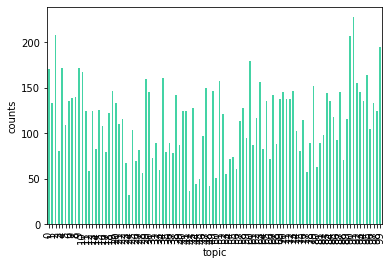

In [93]:
pdf = clusterCount.toPandas()
pdf.plot(color = '#44D3A5', legend = False,
                           kind = 'bar', use_index = True,  y = 'count', grid = False)
plt.xlabel('topic')
plt.ylabel('counts')

plt.show()

In [103]:
# x_array = concat_df.select('x').collect()
# y_array = concat_df.select('y').collect()
# p_array = concat_df.select('prediction').collect()

# clusters = pd.DataFrame(dict(x=x_array, y=y_array, prediction=p_array)).groupby('prediction')
pdf = concat_df.toPandas()
clusters = pdf.groupby('prediction')

No handles with labels found to put in legend.


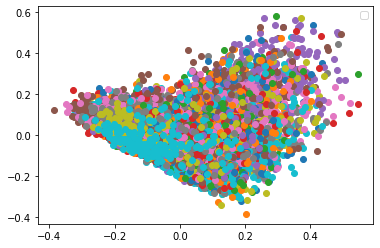

In [104]:
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for prediction, cluster in clusters:
    ax.plot(cluster.x, cluster.y, marker='.', linestyle='', ms=12)
ax.legend()

plt.show()

In [105]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
silhouette_avg = silhouette_score(X, cluster_labels)
print(silhouette_avg)